### Intermediate Level Task 2: Prediction using Decision Tree Algorithm
### Concept Used: Supervised Machine Learning
### Author: Prateek Shah

In [1]:
# Importing some required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
iris = pd.read_csv('Iris2.csv')
iris = iris.drop("Id", axis=1) # removing the Id column

In [3]:
# Displaying the dataset
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Displaying information about the dataset.
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Displaing number of records having NULL values in the respective columns
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# Encoding the categorical variable using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder =  LabelEncoder()
iris['Species'] = label_encoder.fit_transform(iris['Species'])
iris['Species'].unique()

array([0, 1, 2])

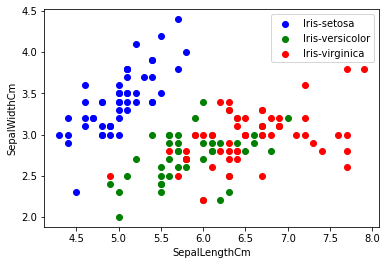

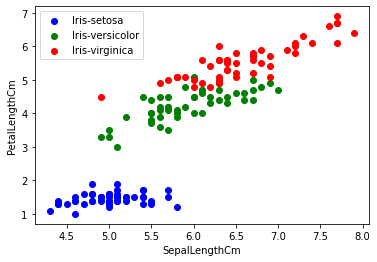

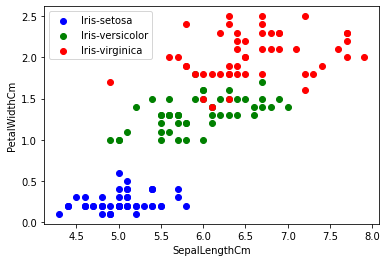

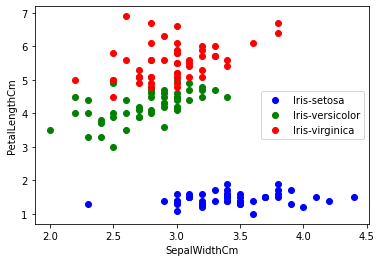

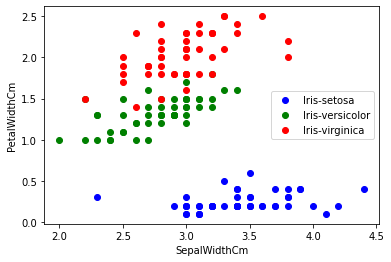

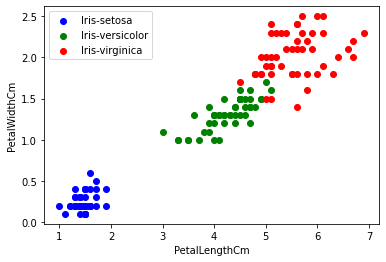

In [7]:
#Plotting the scatter plot
def scatter_plot(x, y):
    x1 = iris.loc[iris['Species']==0][x].values
    y1 = iris.loc[iris['Species']==0][y].values
    plt.scatter(x1, y1, c ="blue", label='Iris-setosa')

    x2 = iris.loc[iris['Species']==1][x].values
    y2 = iris.loc[iris['Species']==1][y].values
    plt.scatter(x2, y2, c ="green", label='Iris-versicolor')

    x3 = iris.loc[iris['Species']==2][x].values
    y3 = iris.loc[iris['Species']==2][y].values
    plt.scatter(x3, y3, c ="red", label='Iris-virginica')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.show()

scatter_plot('SepalLengthCm', 'SepalWidthCm')
scatter_plot('SepalLengthCm', 'PetalLengthCm')
scatter_plot('SepalLengthCm', 'PetalWidthCm')
scatter_plot('SepalWidthCm', 'PetalLengthCm')
scatter_plot('SepalWidthCm', 'PetalWidthCm')
scatter_plot('PetalLengthCm', 'PetalWidthCm')

In [8]:
# Performed Stratified Shuffle Split
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in split.split(iris, iris['Species']):
    strat_train_set = iris.loc[train_index]
    strat_test_set = iris.loc[test_index]

In [9]:
# Divided the train and test data into features and labels
X_train = np.array(strat_train_set.drop(["Species"], axis=1))
y_train = np.array(strat_train_set["Species"].copy())
X_test = np.array(strat_test_set.drop(["Species"], axis=1))
y_test = np.array(strat_test_set["Species"].copy())

In [10]:
# Instantiating the Decision Tree Classifier model and fitting the training data
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

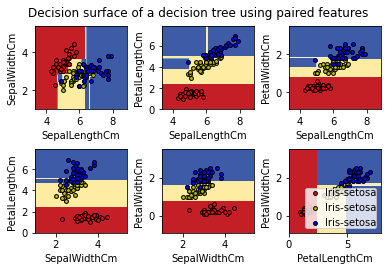

In [11]:
# Plotting the Decision Boundary
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    X = X_train[:, pair]
    y = y_train

    clf = DecisionTreeClassifier().fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.columns[pair[0]])
    plt.ylabel(iris.columns[pair[1]])

    for i, color in zip(range(3), "ryb"):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label= (label_encoder.inverse_transform([y[i]]))[0],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc = "lower right", borderpad=0, handletextpad=0)
plt.show()

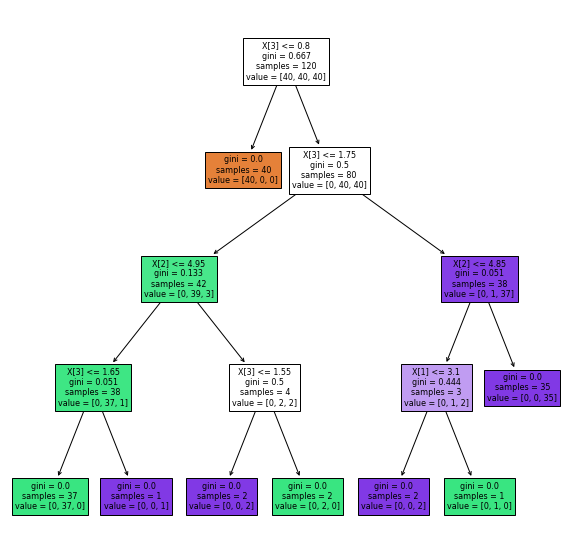

In [12]:
# Displaying the Decision Tree
fig, axes = plt.subplots(1, 1, figsize=(10,10))
plot_tree(model, filled=True)
plt.show()

In [13]:
# Displaying the test features
X_test

array([[5.5, 3.5, 1.3, 0.2],
       [5.7, 2.8, 4.5, 1.3],
       [5.1, 3.8, 1.9, 0.4],
       [6.1, 2.6, 5.6, 1.4],
       [5.1, 3.4, 1.5, 0.2],
       [5.5, 2.6, 4.4, 1.2],
       [6.5, 3. , 5.2, 2. ],
       [4.6, 3.2, 1.4, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.3, 3.4, 5.6, 2.4],
       [5.6, 3. , 4.1, 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [6.9, 3.1, 5.4, 2.1],
       [5.8, 2.7, 4.1, 1. ],
       [5.8, 2.7, 5.1, 1.9],
       [5.7, 2.5, 5. , 2. ],
       [6.7, 3.1, 4.4, 1.4],
       [7. , 3.2, 4.7, 1.4],
       [5.1, 3.8, 1.6, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [5.6, 2.8, 4.9, 2. ],
       [6.3, 2.9, 5.6, 1.8],
       [7.2, 3. , 5.8, 1.6],
       [5.1, 3.7, 1.5, 0.4],
       [6.7, 3.1, 4.7, 1.5],
       [5.7, 2.8, 4.1, 1.3],
       [6.3, 3.3, 6. , 2.5],
       [5.1, 3.5, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [14]:
# Displaying the predicted values from test features
pred = model.predict(X_test)
result_df = pd.DataFrame({'Actual': label_encoder.inverse_transform(y_test), 'Predicted': label_encoder.inverse_transform(pred)})
result_df

,Actual,Predicted
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-versicolor,Iris-versicolor


In [15]:
# Accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy=", accuracy_score(pred, y_test))

Accuracy= 0.9666666666666667


In [16]:
# Predicting the species of iris flower if sepal length=6.4cm., sepal width=3.4cm., petal length=2.7cm., petal width=5.2cm
features_pred = [[6.4, 3.4, 2.7, 5.2]]
pred2 = model.predict(features_pred)
print("Prediction: ", (label_encoder.inverse_transform(pred2))[0])

Prediction:  Iris-versicolor
